In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training6.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.283796,0.588021,0.290969,0.282278,0.784029,0.784029,0.784029,0.0,0.784029,0.0,...,0.0,0.0,0.0,0.0,0.138435,0.774979,0.841925,0.729303,0.035697,208500
1,0.092527,0.596101,0.365551,0.329517,0.794802,0.794802,0.794802,0.0,0.397401,0.0,...,0.0,0.0,0.0,0.0,0.366577,0.781355,0.853494,0.739325,0.224365,181500
2,0.276849,0.575928,0.293967,0.377339,0.767904,0.000000,0.767904,0.0,0.767904,0.0,...,0.0,0.0,0.0,0.0,0.645407,0.749653,0.824610,0.714304,0.048948,223500
3,0.325659,0.577848,0.260568,0.317907,0.770464,0.000000,0.770464,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.134972,0.757275,0.827359,0.000000,0.638451,140000
4,0.247985,0.518287,0.326673,0.434552,0.691049,0.000000,0.691049,0.0,0.345525,0.0,...,0.0,0.0,0.0,0.0,0.775564,0.664857,0.742080,0.642814,0.050342,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.149958,-0.395050,0.113581,0.317537,-0.488240,-0.317057,-0.200098,-0.014314,-0.165933,0.005742,...,0.042390,0.090962,0.085395,-0.026840,-0.098794,-0.573913,-0.307684,-0.001034,-0.571548,1.000000
GrLivArea,0.109397,-0.208915,0.099421,-0.015611,-0.224525,-0.168171,-0.128206,-0.020050,-0.100007,-0.048385,...,0.007700,0.052381,0.053335,-0.037432,-0.011940,-0.271855,-0.175348,-0.041676,-0.228113,0.589120
GarageArea,-0.102609,-0.272965,0.163152,0.069512,-0.206190,-0.167510,-0.007230,0.000376,-0.087617,-0.063508,...,0.027967,0.018784,-0.006017,-0.042975,-0.030864,-0.209394,-0.180956,0.078789,-0.504633,0.505566
GarageCars,-0.025598,-0.226690,0.131242,0.014013,-0.165928,-0.177420,-0.005890,0.001519,-0.085281,-0.069889,...,0.027165,0.015425,-0.017865,-0.060124,-0.016287,-0.172838,-0.147486,0.097013,-0.558473,0.504552
TotalBsmtSF,-0.254642,-0.150886,0.175788,0.059492,-0.126953,-0.170931,0.001812,-0.022100,-0.037908,-0.047332,...,0.030134,0.062056,0.009560,-0.043781,-0.016115,-0.159271,-0.161371,0.024657,-0.400962,0.500621
OverallQual,0.158913,-0.069057,0.056226,-0.338996,0.145592,-0.086879,0.110167,-0.016284,0.046199,-0.166283,...,0.006592,0.005374,-0.027426,-0.061161,0.091586,0.161213,0.009252,0.185739,-0.498392,0.488216
1stFlrSF,-0.244680,-0.102913,0.205277,0.009925,-0.105627,-0.135931,-0.032153,0.002520,-0.040561,-0.039258,...,0.042364,0.054946,0.018800,-0.055110,0.003352,-0.132602,-0.181235,-0.006951,-0.282207,0.436239
MasVnrArea,0.024757,-0.156048,0.043841,0.025674,-0.192391,-0.113695,-0.023828,0.060766,-0.054439,-0.049446,...,0.018037,0.053694,-0.018137,-0.033129,-0.054778,-0.213859,-0.144448,-0.013854,-0.322663,0.426354
Fireplaces,-0.061848,-0.126831,0.074122,0.179437,-0.233658,-0.209772,-0.134864,0.013120,-0.094607,0.033067,...,0.008254,0.169294,0.050150,-0.006998,-0.028060,-0.284568,-0.110770,-0.000086,-0.176910,0.399534
FullBath,0.166597,-0.228867,0.023200,-0.132801,-0.062543,-0.136374,0.037362,-0.034132,0.003399,-0.118610,...,0.025886,-0.061983,-0.011930,-0.036091,0.019664,-0.081209,-0.083164,0.089712,-0.480101,0.395909


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF',
       'OverallQual', '1stFlrSF', 'MasVnrArea', 'Fireplaces', 'FullBath'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,36387.712329,61535.134716,0.506335
1,11,37075.171233,57600.186762,0.567452
2,12,32117.191781,56328.952881,0.586334
3,13,37089.445205,60146.292933,0.528367
4,14,38794.777397,66850.111779,0.417373
...,...,...,...,...
105,115,36211.506849,65695.705750,0.437322
106,116,31178.383562,49406.890553,0.681755
107,117,33278.777397,52196.349164,0.644805
108,118,32745.958904,51540.422661,0.653676


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
65,75,28582.082192,42079.166072,0.769155
101,111,29427.400685,44313.754228,0.743986
74,84,30049.530822,45530.423789,0.729735
72,82,30108.407534,43473.324262,0.753605
8,18,30515.743151,45626.143836,0.728598
...,...,...,...,...
44,54,39731.058219,71431.118355,0.334786
27,37,40884.414384,69419.171029,0.371732
9,19,41765.561644,71982.407942,0.324479
21,31,41793.722603,74344.827148,0.279411


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


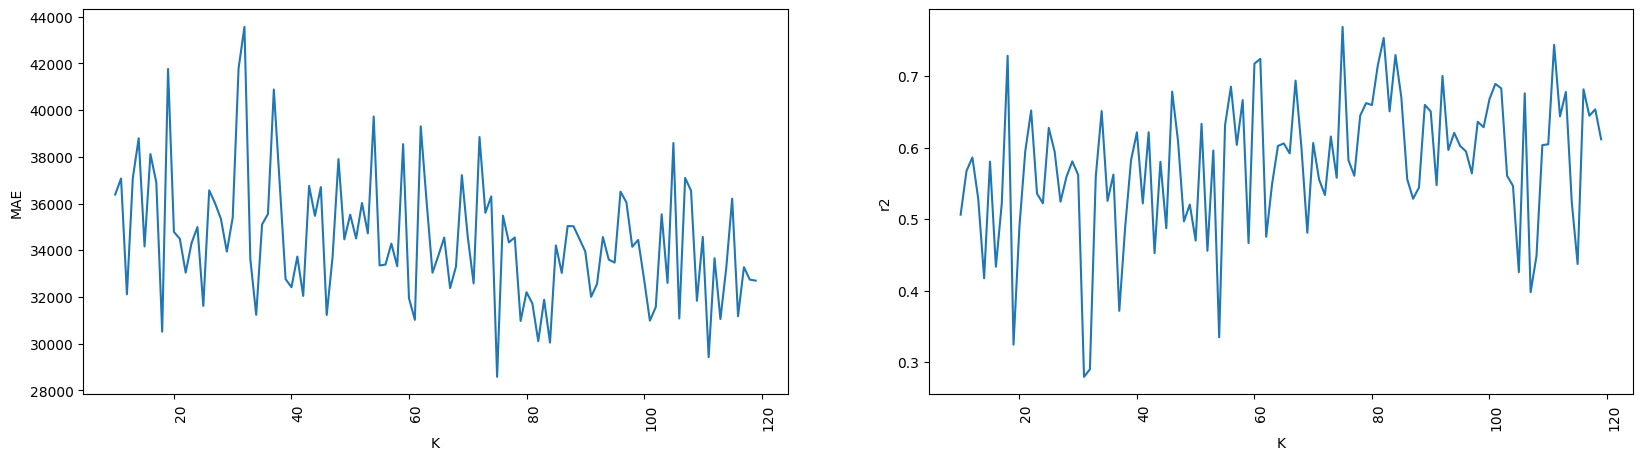

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       4.398967e-02
MSZoning         2.081592e-02
LotFrontage      7.395555e-03
LotArea          1.775773e-02
Street           8.537823e-03
                     ...     
YrSold           8.563767e-03
SaleType         3.334230e-02
SaleCondition    4.257620e-02
Ageofhouse       4.753259e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,32782.044521,52525.003110,0.640318
1,101,31122.613014,50205.452612,0.671385
2,102,29438.955479,47648.650063,0.704003
3,103,33824.619863,52670.131848,0.638328
4,104,32713.808219,47010.670827,0.711876
...,...,...,...,...
395,495,35125.284247,59492.002455,0.538573
396,496,34085.448630,57070.714908,0.575368
397,497,33346.921233,54702.024469,0.609885
398,498,28451.085616,43442.455337,0.753955


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
188,288,27074.171233,38924.023334,0.802475
37,137,27423.345890,42518.381924,0.764311
61,161,28032.455479,44828.615505,0.738003
128,228,28229.654110,48806.810742,0.689439
32,132,28232.061644,41422.662950,0.776302
...,...,...,...,...
241,341,37393.393836,58138.497595,0.559330
120,220,37868.339041,65497.565051,0.440711
374,474,38081.527397,59919.676275,0.531915
84,184,38403.160959,62190.027908,0.495771


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


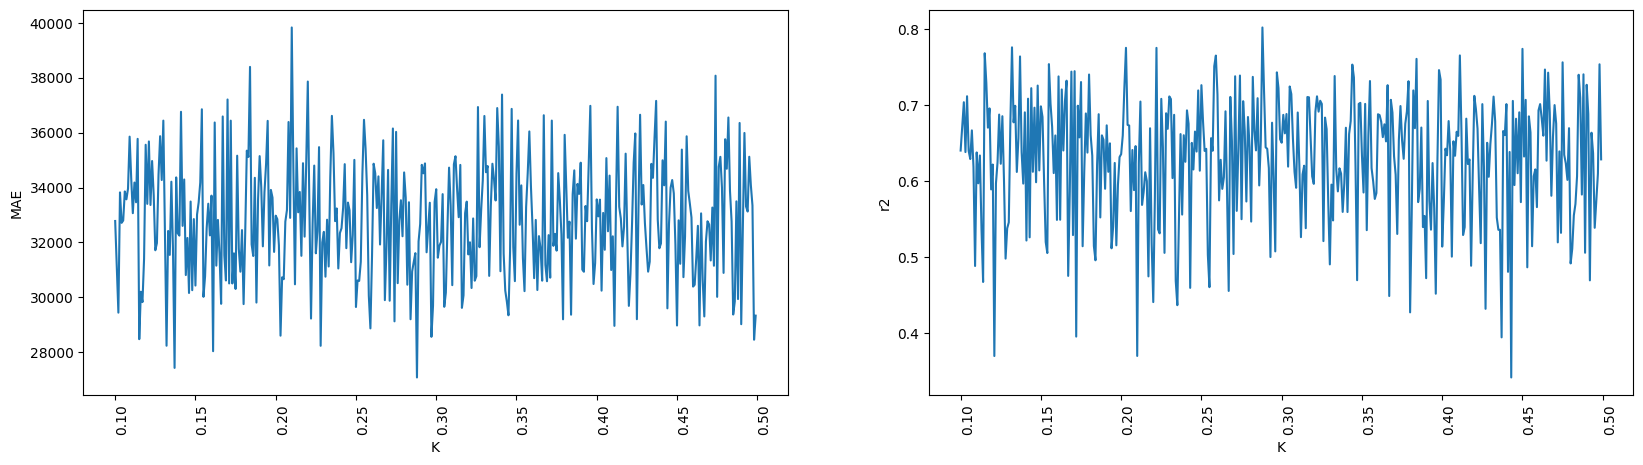

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


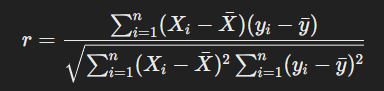

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.4882156521131217


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,35295.476027,64075.624362,0.464731
1,6,39342.136986,64237.851151,0.462017
2,7,36992.393836,65239.895674,0.445103
3,8,33220.931507,55653.550885,0.596195
4,9,33437.030822,56986.990985,0.576613
...,...,...,...,...
110,115,29419.246575,45370.935172,0.731625
111,116,35863.760274,63227.481484,0.478808
112,117,30395.842466,43677.722117,0.751283
113,118,29158.287671,46332.715520,0.720127


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
68,73,28104.229452,40827.257392,0.782687
89,94,28797.280822,44508.524742,0.741731
104,109,28984.438356,43442.772108,0.753951
113,118,29158.287671,46332.715520,0.720127
110,115,29419.246575,45370.935172,0.731625
...,...,...,...,...
37,42,39237.818493,60887.471589,0.516672
1,6,39342.136986,64237.851151,0.462017
51,56,39632.229452,64681.610447,0.454559
19,24,40600.500000,65676.237683,0.437655


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


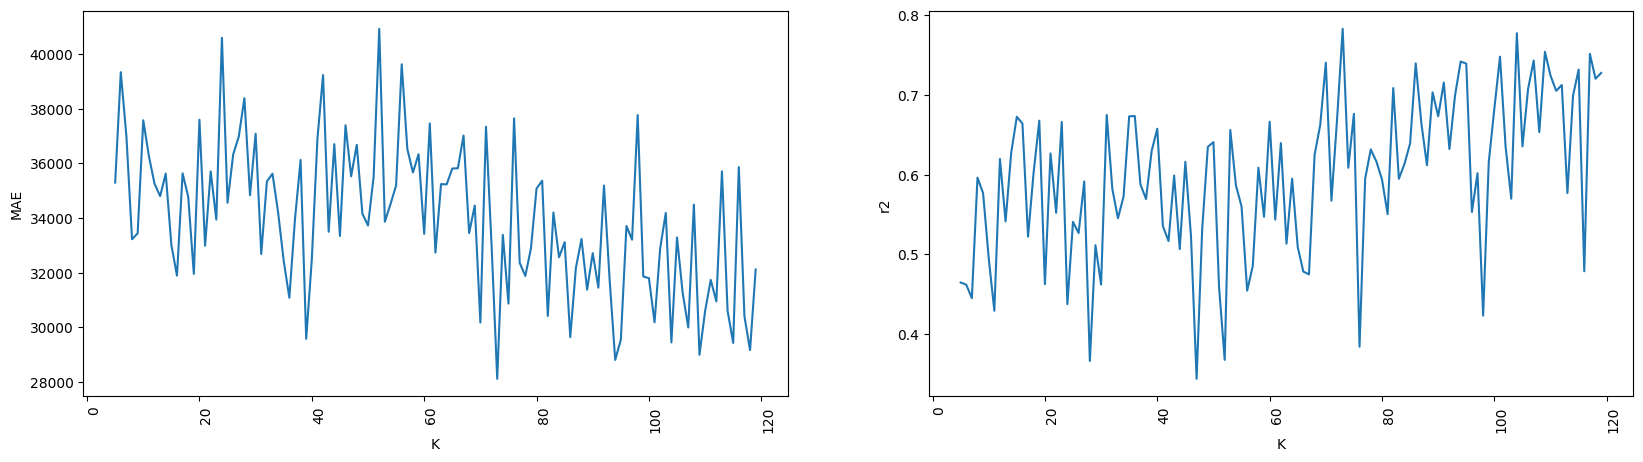

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

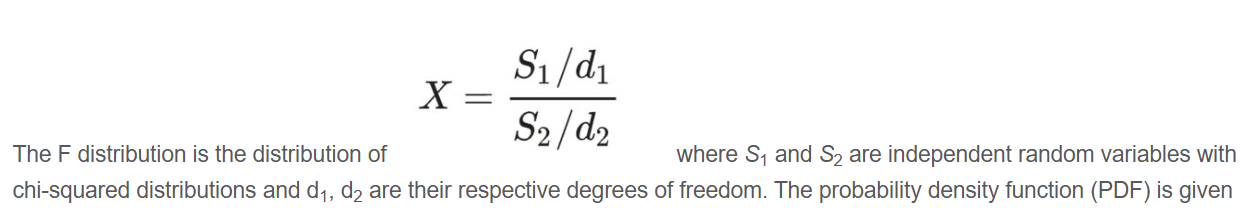

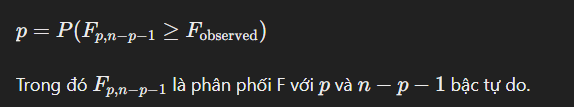

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,32193.174658,46056.541054,0.723453
1,6,28938.770548,44001.194038,0.747585
2,7,27655.794521,39555.891328,0.796010
3,8,31560.044521,49450.273878,0.681196
4,9,31248.589041,52384.761672,0.642236
...,...,...,...,...
110,115,32212.849315,59833.044214,0.533267
111,116,33219.397260,59162.944582,0.543663
112,117,33358.410959,57028.819090,0.575991
113,118,30661.650685,46264.677266,0.720948


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
28,33,27528.565068,42150.416138,0.768373
29,34,27571.287671,42391.491684,0.765715
2,7,27655.794521,39555.891328,0.796010
22,27,27902.390411,43889.328977,0.748867
25,30,28061.630137,42772.415484,0.761486
...,...,...,...,...
99,104,35279.465753,63247.989002,0.478470
93,98,36204.297945,57556.740224,0.568105
81,86,37198.510274,61179.132108,0.512030
12,17,37308.020548,65679.885524,0.437593


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


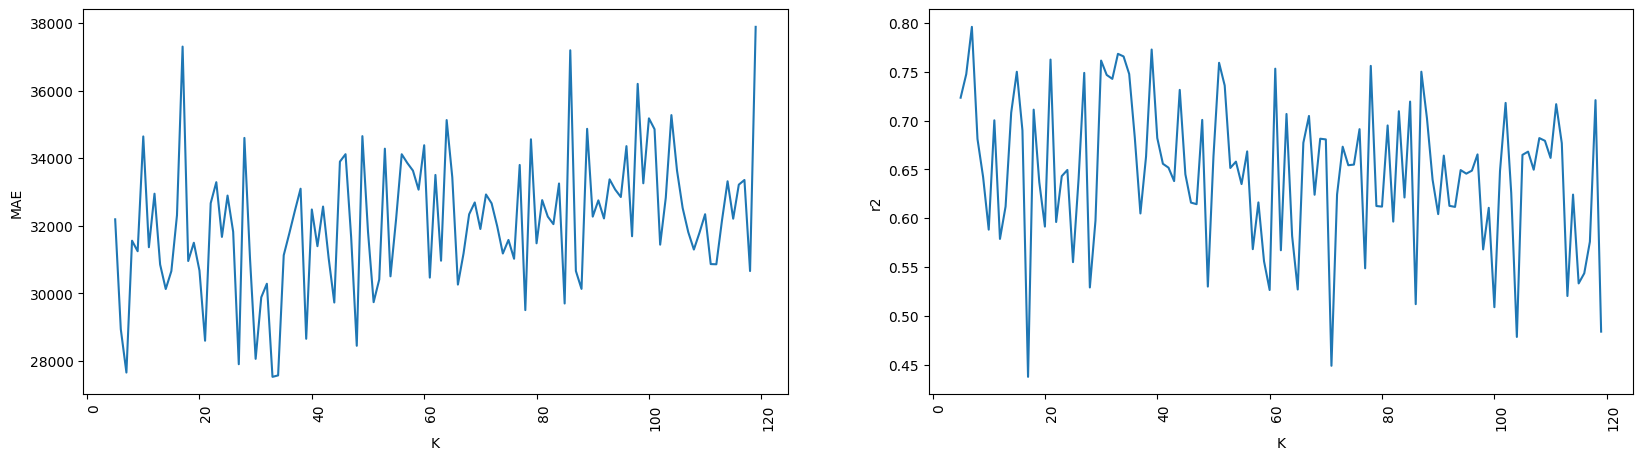

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

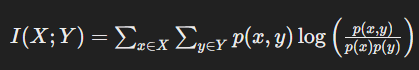

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

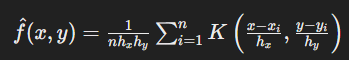

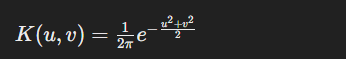

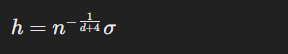

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,37332.342466,60742.279197,0.518974
1,6,36167.376712,59540.045295,0.537827
2,7,34957.667808,58247.241365,0.557680
3,8,33391.311644,54653.953278,0.610570
4,9,33666.722603,53450.982534,0.627525
...,...,...,...,...
110,115,29656.537671,46430.124206,0.718949
111,116,38047.339041,64679.900707,0.454588
112,117,34744.400685,60227.440229,0.527094
113,118,30947.647260,45524.320463,0.729808


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
103,108,28128.547945,41494.795512,0.775522
97,102,28623.897260,42960.009292,0.759389
114,119,28847.304795,42088.041582,0.769058
26,31,29449.493151,44614.209658,0.740503
100,105,29460.106164,44904.716174,0.737112
...,...,...,...,...
0,5,37332.342466,60742.279197,0.518974
68,73,37763.719178,64234.111024,0.462080
78,83,37899.835616,57682.419616,0.566216
111,116,38047.339041,64679.900707,0.454588


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_27020\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


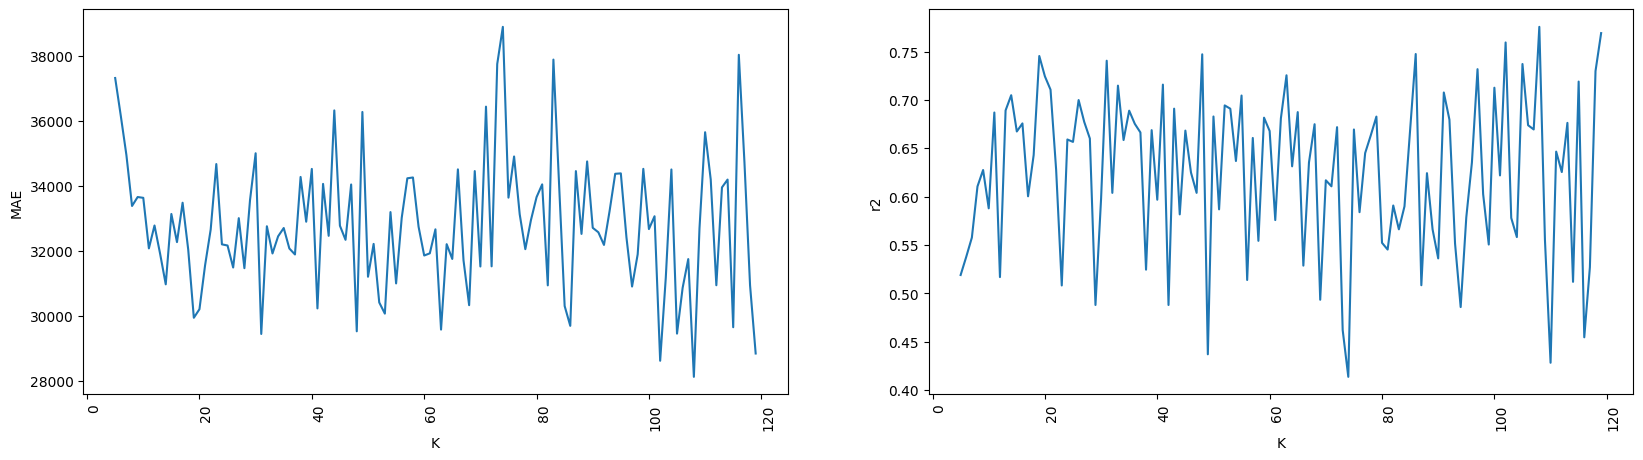

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987
1,6,30848.821918,48806.875191,0.689438
2,7,31759.996575,48543.677210,0.692779
3,8,35324.150685,58702.112897,0.550744
4,9,32119.191781,56446.864518,0.584601
...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705
111,116,33541.866438,57154.550185,0.574119
112,117,37123.773973,69512.773410,0.370036
113,118,33971.434932,51615.333079,0.652669


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,32216.571918,51029.290761,0.660511
1,6,31696.952055,51785.612944,0.650373
2,7,30930.285959,45474.885169,0.730394
3,8,28150.852740,41612.531800,0.774247
4,9,26277.441781,39881.420468,0.792639
...,...,...,...,...
110,115,33571.458904,57774.979377,0.564823
111,116,32946.318493,53217.789456,0.630768
112,117,32988.753425,50576.188337,0.666513
113,118,34779.452055,56433.891155,0.584792


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,37332.342466,60742.279197,0.518974
1,6,36167.376712,59540.045295,0.537827
2,7,34957.667808,58247.241365,0.557680
3,8,33391.311644,54653.953278,0.610570
4,9,33666.722603,53450.982534,0.627525
...,...,...,...,...
110,115,29656.537671,46430.124206,0.718949
111,116,38047.339041,64679.900707,0.454588
112,117,34744.400685,60227.440229,0.527094
113,118,30947.647260,45524.320463,0.729808


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639
...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511,37332.342466,60742.279197,0.518974
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373,36167.376712,59540.045295,0.537827
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394,34957.667808,58247.241365,0.557680
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247,33391.311644,54653.953278,0.610570
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639,33666.722603,53450.982534,0.627525
...,...,...,...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823,29656.537671,46430.124206,0.718949
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768,38047.339041,64679.900707,0.454588
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513,34744.400685,60227.440229,0.527094
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792,30947.647260,45524.320463,0.729808


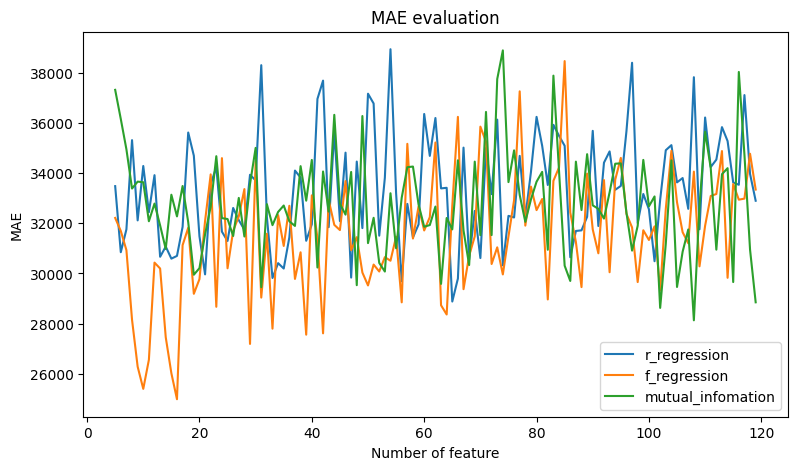

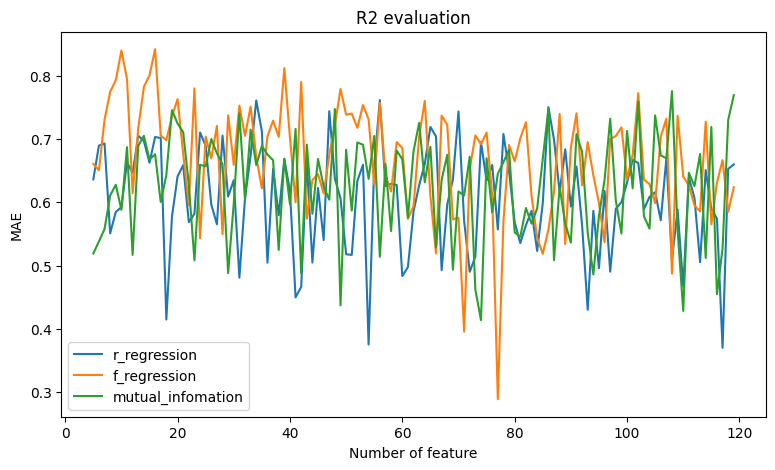

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()